In [1]:
import numpy as np                 
import pandas as pd                
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
def combine_state_df(dataset_src, state_name):

    # Read stations_info.csv and drop unnecessary columns
    df_states = pd.read_csv(f'{dataset_src}/stations_info.csv')
    df_states.drop(columns=['agency', 'station_location', 'start_month'], inplace=True)

    # Filter df_states based on state_name and sort by city and start_year
    filtered_states = df_states[df_states["state"] == state_name].sort_values(by=["city", "start_year"])

    # Get unique states
    unique_states = df_states['state'].unique()

    # Get state code and state files for the given state_name
    state_code = filtered_states['file_name'].iloc[0][:2]
    state_files = glob.glob(f'{dataset_src}/{state_code}*.csv')

    print(f'Combining a total of {len(state_files)} files...\n')

    combined_df = []
    
    for state_file in state_files:
        file_name = state_file.split(f'{dataset_src}\\')[1][0:-4]
        file_df = pd.read_csv(state_file)
        file_df['city'] = filtered_states[filtered_states['file_name'] == file_name]['city'].values[0]
        file_df['city'] = file_df['city'].astype('string')
        combined_df.append(file_df)

    return pd.concat(combined_df)

# Example usage
dataset_src = './archive (1)'
df = combine_state_df(dataset_src, 'Tamil Nadu')

Combining a total of 26 files...



In [3]:
def columns_name(df):
    column_names = []
    for name in list(df.columns):
        column_names.append(name.split()[0])
    return sorted(column_names)

def create_dt_index(dataframe):
    dataframe = dataframe.drop(columns='To Date')
    dataframe['From Date'] = pd.to_datetime(dataframe['From Date'])
    dataframe = dataframe.rename(columns={'From Date': 'datetime'})
    return dataframe.set_index('datetime')

def value_dropper(df):
    # dropping values that have more than 80% null values
    null_values = null_value_percentage(df)
    droppable_values = [key for key, value in null_values.items() if value > 0.80 ]
    new_df = df.drop(droppable_values,axis=1)
    return new_df

def null_columns_per_city(df):
    Null_Value_Dictionary = {}
    for i in range(len(cities)):
        Null_Value_Dictionary[cities[i]] = df.columns[df[df["city"] == cities[i]].isnull().all()].tolist()
    return [key + f"   {len(value)}  {value}" for key, value in Null_Value_Dictionary.items()]

def null_value_percentage(df):
    null_percentage = {}
    for i in list(df.columns):
        null_percentage[i] = round(len(df[df[i].isnull()])/len(df),3)
    return null_percentage    


def column_merger(df1,column_name1,column_name2,convertion = 1):
    df1[column_name2] = df1[column_name2] * convertion
    df1[column_name1].fillna(df1[column_name2],inplace = True)
    df1.drop([column_name2], axis=1, inplace=True)

    
df = create_dt_index(df)


column_merger(df,"NOx (ppb)","NOx (ppm)",1000)
column_merger(df,'BP (mmHg)','BP (mg/m3)',0.00750062)
column_merger(df,'WD (degree)','WD (deg)')
column_merger(df,'RH (%)','RH ()')
column_merger(df,'WS (m/s)','VWS (m/s)')


nulls = null_value_percentage(df)
print("Null Value Percentage Per column\n")
print(nulls)
print("Dropping Columns: \n")
[print(key,value) for key, value in nulls.items() if value > 0.80 ]

dropped_data = value_dropper(df)

Null Value Percentage Per column

{'PM2.5 (ug/m3)': 0.405, 'PM10 (ug/m3)': 0.601, 'NO (ug/m3)': 0.212, 'NO2 (ug/m3)': 0.198, 'NOx (ppb)': 0.211, 'NH3 (ug/m3)': 0.537, 'SO2 (ug/m3)': 0.237, 'CO (mg/m3)': 0.358, 'Ozone (ug/m3)': 0.403, 'Benzene (ug/m3)': 0.587, 'Toluene (ug/m3)': 0.6, 'Eth-Benzene (ug/m3)': 0.895, 'MP-Xylene (ug/m3)': 0.888, 'O Xylene (ug/m3)': 0.888, 'Temp (degree C)': 0.576, 'RH (%)': 0.23, 'WS (m/s)': 0.206, 'SR (W/mt2)': 0.26, 'BP (mmHg)': 0.393, 'city': 0.0, 'CH4 (ug/m3)': 0.925, 'THC (ug/m3)': 0.949, 'WD (degree)': 0.252, 'Xylene (ug/m3)': 1.0, 'AT (degree C)': 0.819, 'RF (mm)': 0.756}
Dropping Columns: 

Eth-Benzene (ug/m3) 0.895
MP-Xylene (ug/m3) 0.888
O Xylene (ug/m3) 0.888
CH4 (ug/m3) 0.925
THC (ug/m3) 0.949
Xylene (ug/m3) 1.0
AT (degree C) 0.819


In [4]:
cities = list(df["city"].unique())
cities
null_columns_per_city(df)

["Chennai   1  ['Xylene (ug/m3)']",
 "Coimbatore   5  ['O Xylene (ug/m3)', 'Temp (degree C)', 'CH4 (ug/m3)', 'THC (ug/m3)', 'Xylene (ug/m3)']",
 "Thoothukudi   9  ['PM2.5 (ug/m3)', 'NH3 (ug/m3)', 'Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'O Xylene (ug/m3)', 'CH4 (ug/m3)', 'THC (ug/m3)', 'Xylene (ug/m3)', 'AT (degree C)']",
 "Gummidipoondi   10  ['CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'O Xylene (ug/m3)', 'CH4 (ug/m3)', 'THC (ug/m3)', 'Xylene (ug/m3)']",
 "Hosur   7  ['Toluene (ug/m3)', 'O Xylene (ug/m3)', 'Temp (degree C)', 'CH4 (ug/m3)', 'THC (ug/m3)', 'Xylene (ug/m3)', 'RF (mm)']",
 "Tirupur   7  ['Toluene (ug/m3)', 'O Xylene (ug/m3)', 'Temp (degree C)', 'CH4 (ug/m3)', 'THC (ug/m3)', 'Xylene (ug/m3)', 'RF (mm)']",
 "Chengalpattu   11  ['Benzene (ug/m3)', 'Toluene (ug/m3)', 'Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'O Xylene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'CH4 (ug/m3)', 'THC (ug/m3)', 'Xylene (ug/m3)'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600031 entries, 2010-01-01 00:00:00 to 2023-03-31 23:00:00
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PM2.5 (ug/m3)        357220 non-null  float64
 1   PM10 (ug/m3)         239465 non-null  float64
 2   NO (ug/m3)           473030 non-null  float64
 3   NO2 (ug/m3)          481239 non-null  float64
 4   NOx (ppb)            473362 non-null  float64
 5   NH3 (ug/m3)          277992 non-null  float64
 6   SO2 (ug/m3)          458079 non-null  float64
 7   CO (mg/m3)           385000 non-null  float64
 8   Ozone (ug/m3)        358115 non-null  float64
 9   Benzene (ug/m3)      247839 non-null  float64
 10  Toluene (ug/m3)      239932 non-null  float64
 11  Eth-Benzene (ug/m3)  63213 non-null   float64
 12  MP-Xylene (ug/m3)    67341 non-null   float64
 13  O Xylene (ug/m3)     67353 non-null   float64
 14  Temp (degree C)      254445 non-nu

In [6]:
df.duplicated().sum()

87009

In [53]:
interpolateble_values = []
for k, v in null_value_percentage(df[df.index.year > 2021]).items():
    if v <0.2:
        interpolateble_values.append(k)
interpolateble_values

['NO2 (ug/m3)', 'NOx (ppb)', 'SO2 (ug/m3)', 'WS (m/s)', 'SR (W/mt2)', 'city']

In [13]:
data = df[df.index.year > 2021]

In [17]:
data = value_dropper(data)

In [18]:
len(data.columns)

20

In [19]:
dropping_cities = ["Cuddalore","Palkalaiperur"]
data.drop(data[data.city.isin(dropping_cities)].index,inplace=True)

In [20]:
def missing_value_validation(value):
    air_q = df[value].reset_index()
    air_q["interpolate(method='linear')"] = air_q[value].interpolate(method='linear')

    compare_dists(air_q[value], {"Linear Interpolation": air_q["interpolate(method='linear')"]})

In [21]:
def compare_dists(original_dist, imputed_dists: dict):
    """
    Plot original_dist and imputed_dists on top of each other
    to see the difference in distributions.
    """
    fig, ax = plt.subplots(figsize=(12, 7), dpi=140)
    # Plot the original
    sns.kdeplot(
        original_dist, linewidth=5, ax=ax, color="black", label="Original dist."
    )
    for key, value in imputed_dists.items():
        sns.kdeplot(value, linewidth=3, label=key, ax=ax)

    plt.legend()
    plt.show();

In [ ]:
interpolateble_values.remove('city')
interpolateble_values.remove('NOx (ppb)')
for i in range(len(interpolateble_values)):
    data[interpolateble_values[i]].interpolate(method='linear',inplace=True)
data['NOx (ppb)'].interpolate(method='pad',inplace=True)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train_mice = data.drop("city",axis=1).copy(deep=True)
columns = train_mice.columns
mice_imputer = IterativeImputer(random_state = 42, max_iter=10)
train_mice = mice_imputer.fit_transform(train_mice)
train_mice = pd.DataFrame(train_mice,columns=columns)

for i in columns:
    compare_dists(train_mice[i], {"MICE Interpolation":train_mice[i] })

In [ ]:
null_value_percentage(train_mice)

In [ ]:
new_data = train_mice.set_index(data.index)
new_data["city"] = data["city"]

In [ ]:
new_data.groupby("city")["PM2.5 (ug/m3)"].rolling(window=24,min_periods=16)

In [ ]:
new_data

In [ ]:
data

In [ ]:
aqi = pd.DataFrame()

In [ ]:
aqi["PM10_24hr_avg"] = new_data.groupby("city")["PM10 (ug/m3)"].rolling(window = 24, min_periods = 16).mean().values
aqi["PM2.5_24hr_avg"] = new_data.groupby("city")["PM2.5 (ug/m3)"].rolling(window = 24, min_periods = 16).mean().values
aqi["SO2_24hr_avg"] = new_data.groupby("city")["SO2 (ug/m3)"].rolling(window = 24, min_periods = 16).mean().values
aqi["NOx_24hr_avg"] = new_data.groupby("city")["NOx (ppb)"].rolling(window = 24, min_periods = 16).mean().values
aqi["NH3_24hr_avg"] = new_data.groupby("city")["NH3 (ug/m3)"].rolling(window = 24, min_periods = 16).mean().values
aqi["CO_8hr_max"] = new_data.groupby("city")["CO (mg/m3)"].rolling(window = 8, min_periods = 1).max().values
aqi["O3_8hr_max"] = new_data.groupby("city")["Ozone (ug/m3)"].rolling(window = 8, min_periods = 1).max().values
aqi["NO_24hr_avg"] = new_data.groupby("city")["NO (ug/m3)"].rolling(window = 24, min_periods = 16).mean().values
aqi["No2_24hr_avg"] = new_data.groupby("city")["NO2 (ug/m3)"].rolling(window = 24, min_periods = 16).mean().values
aqi["Benzene_24hr_avg"] = new_data.groupby("city")["Benzene (ug/m3)"].rolling(window = 24, min_periods = 16).mean().values
aqi["Toluene_24hr_avg"] = new_data.groupby("city")["Toluene (ug/m3)"].rolling(window = 24, min_periods = 16).mean().values

def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

aqi["O3_SubIndex"] = aqi["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

aqi["CO_SubIndex"] = aqi["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

aqi["NH3_SubIndex"] = aqi["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))

def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

aqi["NOx_SubIndex"] = aqi["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))

## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

aqi["SO2_SubIndex"] = aqi["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))


def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

aqi["PM10_SubIndex"] = aqi["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))


def get_PM25_subindex(x):
    
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

aqi["PM2.5_SubIndex"] = aqi["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

aqi["Checks"] = (aqi["PM2.5_SubIndex"] > 0).astype(int) + \
                (aqi["PM10_SubIndex"] > 0).astype(int) + \
                (aqi["SO2_SubIndex"] > 0).astype(int) + \
                (aqi["NOx_SubIndex"] > 0).astype(int) + \
                (aqi["NH3_SubIndex"] > 0).astype(int) + \
                (aqi["CO_SubIndex"] > 0).astype(int) + \
                (aqi["O3_SubIndex"] > 0).astype(int)

aqi["AQI_calculated"] = round(aqi[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
aqi.loc[aqi["PM2.5_SubIndex"] + aqi["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
aqi.loc[aqi.Checks < 3, "AQI_calculated"] = np.NaN

aqi["AQI_bucket_calculated"] = aqi["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
aqi[~aqi.AQI_calculated.isna()].head(13)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.tight_layout(pad=3.0)

sns.histplot(data=data['PM2.5 (ug/m3)'], bins=250, kde=True, ax=axes[0,0])
sns.histplot(data=data['CO (mg/m3)'], bins=250, kde=True, ax=axes[0,1])
sns.histplot(data=data['Ozone (ug/m3)'], bins=250, kde=True, ax=axes[1,0])
sns.histplot(data=data['NOx (ppb)'], bins=250, kde=True, ax=axes[1,1])

plt.show()

In [ ]:
data

In [ ]:
fig, axes = plt.subplots(9, 2, figsize=(50, 20))
fig.tight_layout(pad=3.0)

for i in range(len(data.drop('city',axis=1).columns)//2):
    sns.histplot(data=data[data.columns[i]], bins=250, kde=True, ax=axes[i,0])
    sns.histplot(data=data[data.columns[18-i]], bins=250, kde=True, ax=axes[i,1])

In [ ]:
# Example for PM2.5 column
q1 = data['PM2.5 (ug/m3)'].quantile(0.25)
q3 = data['PM2.5 (ug/m3)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = data[(data['PM2.5 (ug/m3)'] < lower_bound) | (data['PM2.5 (ug/m3)'] > upper_bound)]

In [45]:
def outlier_detection(df1,remove = False):
    # Example for PM2.5 column
    df1 = df1.reset_index().drop(["city"],axis=1).copy()
    outliers_per_column = {}
    unique_outliers = set()
    for value in df1.columns:
        q1 = df1[value].quantile(0.25)
        q3 = df1[value].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers_per_column[value] = len(df1[(df1[value] < lower_bound) | (df1[value] > upper_bound)])
        if remove == True:
            for j in np.where((df1[value] < lower_bound) | (df1[value] > upper_bound))[0]:
                if j not in unique_outliers:
                    unique_outliers.add(j)
    if remove == True:
        df1.drop(unique_outliers,inplace= True)
        return df1
    return outliers_per_column,len(unique_outliers)

In [25]:
outlier_detection(data,remove=True)

({'datetime': 0,
  'Benzene (ug/m3)': 8467,
  'Toluene (ug/m3)': 7035,
  'RH (%)': 1910,
  'WS (m/s)': 18577,
  'SR (W/mt2)': 12216,
  'BP (mmHg)': 282,
  'RF (mm)': 1430},
 40650)

In [ ]:
ds,l = outlier_detection(df,remove=True)

In [ ]:
ds.set_index('datetime',inplace=True,drop=True)

In [ ]:
fig, axes = plt.subplots(8, 2, figsize=(50, 20))
fig.tight_layout(pad=3.0)

for i in range(len(ds.columns)//2):
    sns.histplot(data=ds[ds.columns[i]], bins=250, kde=True, ax=axes[i,0])
    sns.histplot(data=ds[ds.columns[14-i]], bins=250, kde=True, ax=axes[i,1])

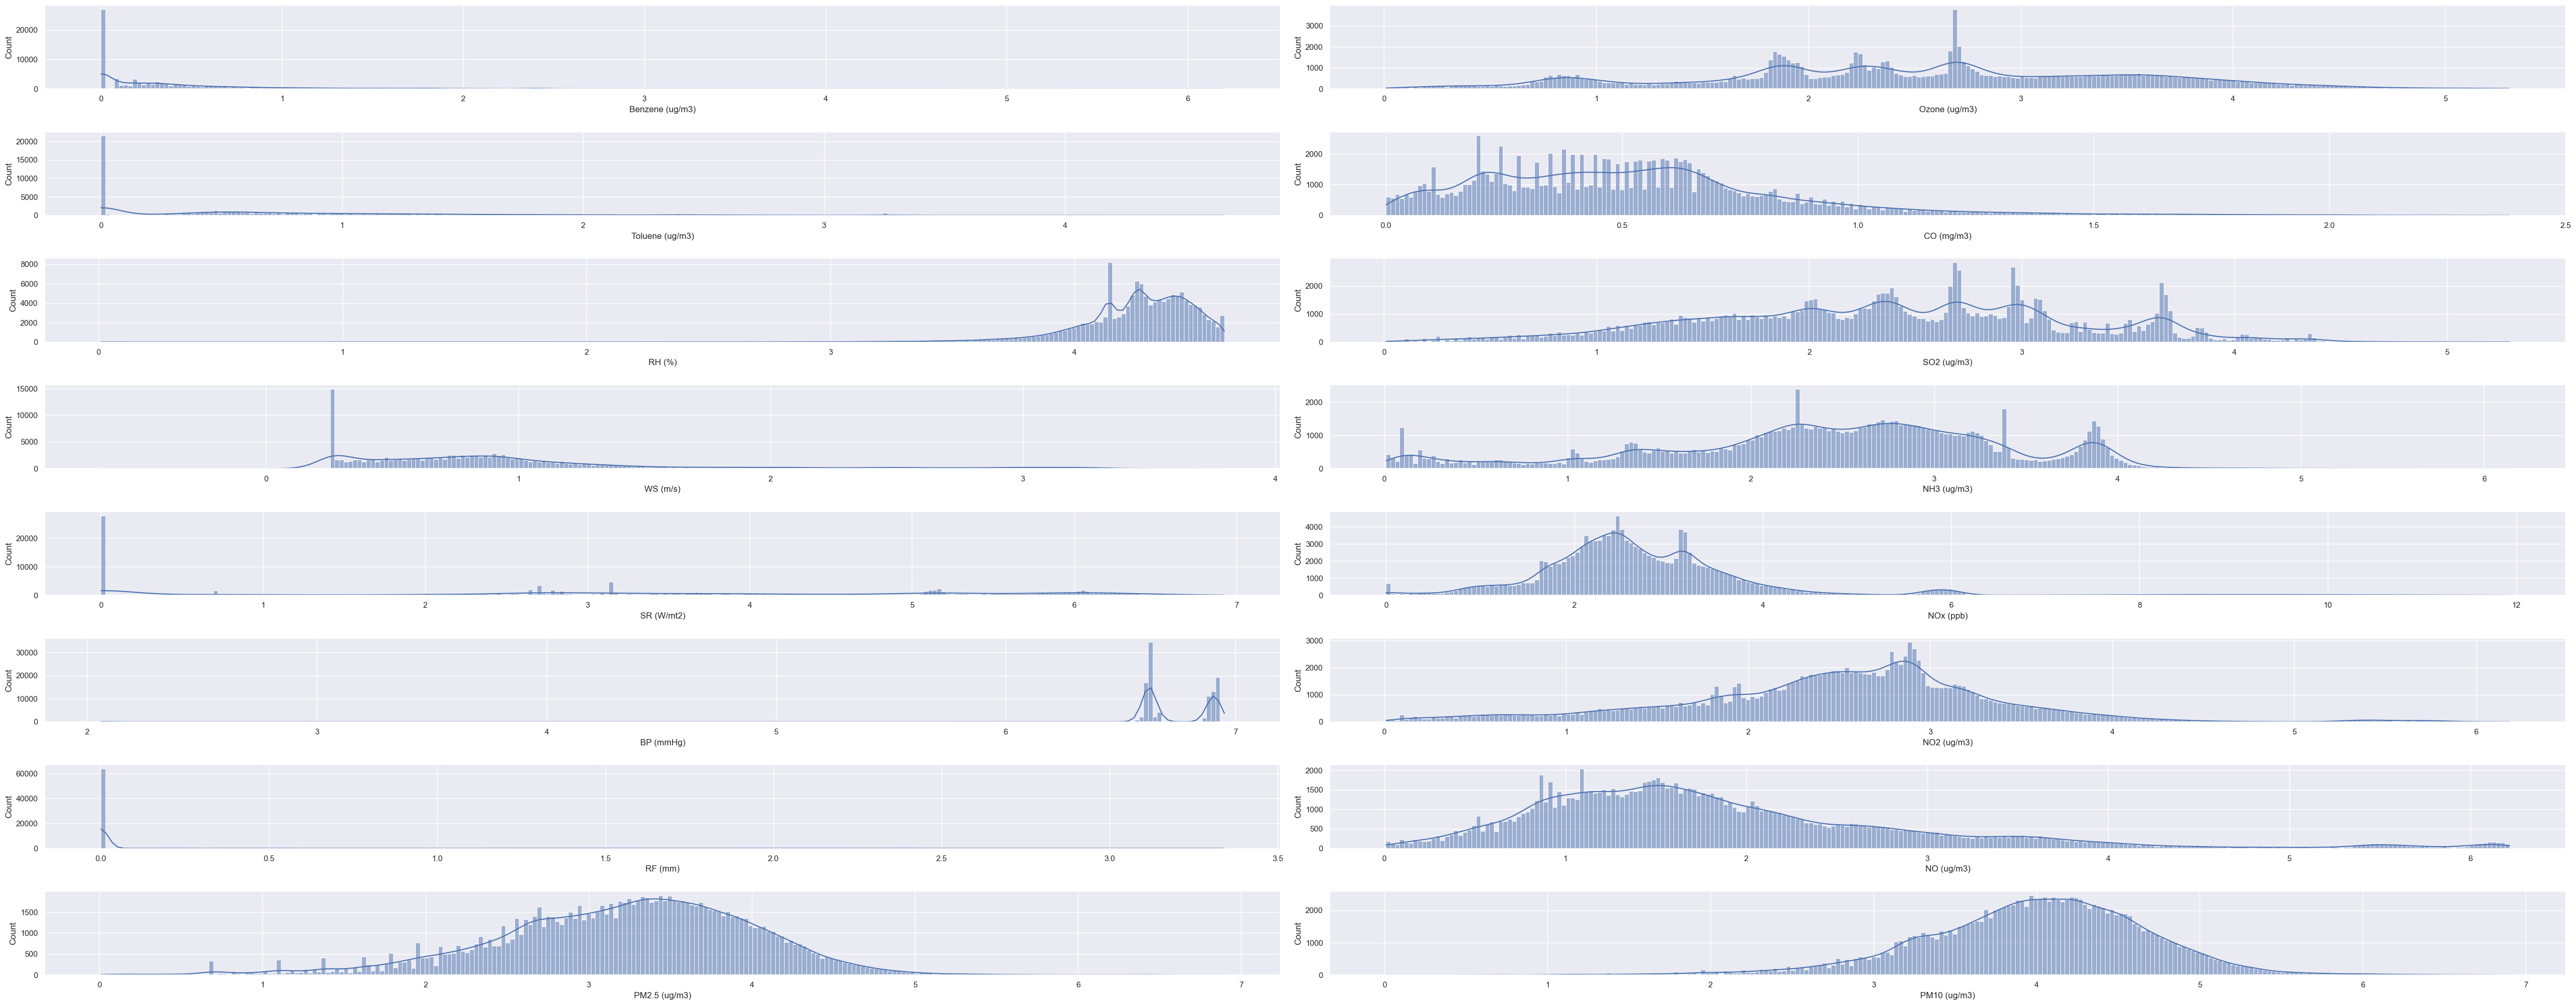

In [34]:
dv = data.copy()
column = ['Benzene (ug/m3)', 'Toluene (ug/m3)', 'RH (%)', 'WS (m/s)', 'SR (W/mt2)', 'BP (mmHg)','RF (mm)','PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)',
       'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)']
len_column = len(column) if len(column)%2 == 0 else len(column)+1
dv[column] = np.log1p(dv[column])

fig, axes = plt.subplots(len_column//2, 2, figsize=(50, 20))
fig.tight_layout(pad=3.0)

for i in range(len(column)//2):
    sns.histplot(data=dv[column[i]], bins=250, kde=True, ax=axes[i,0])
    sns.histplot(data=dv[column[len(column)-i-1]], bins=250, kde=True, ax=axes[i,1])

In [48]:
ds = outlier_detection(dv,remove=True)

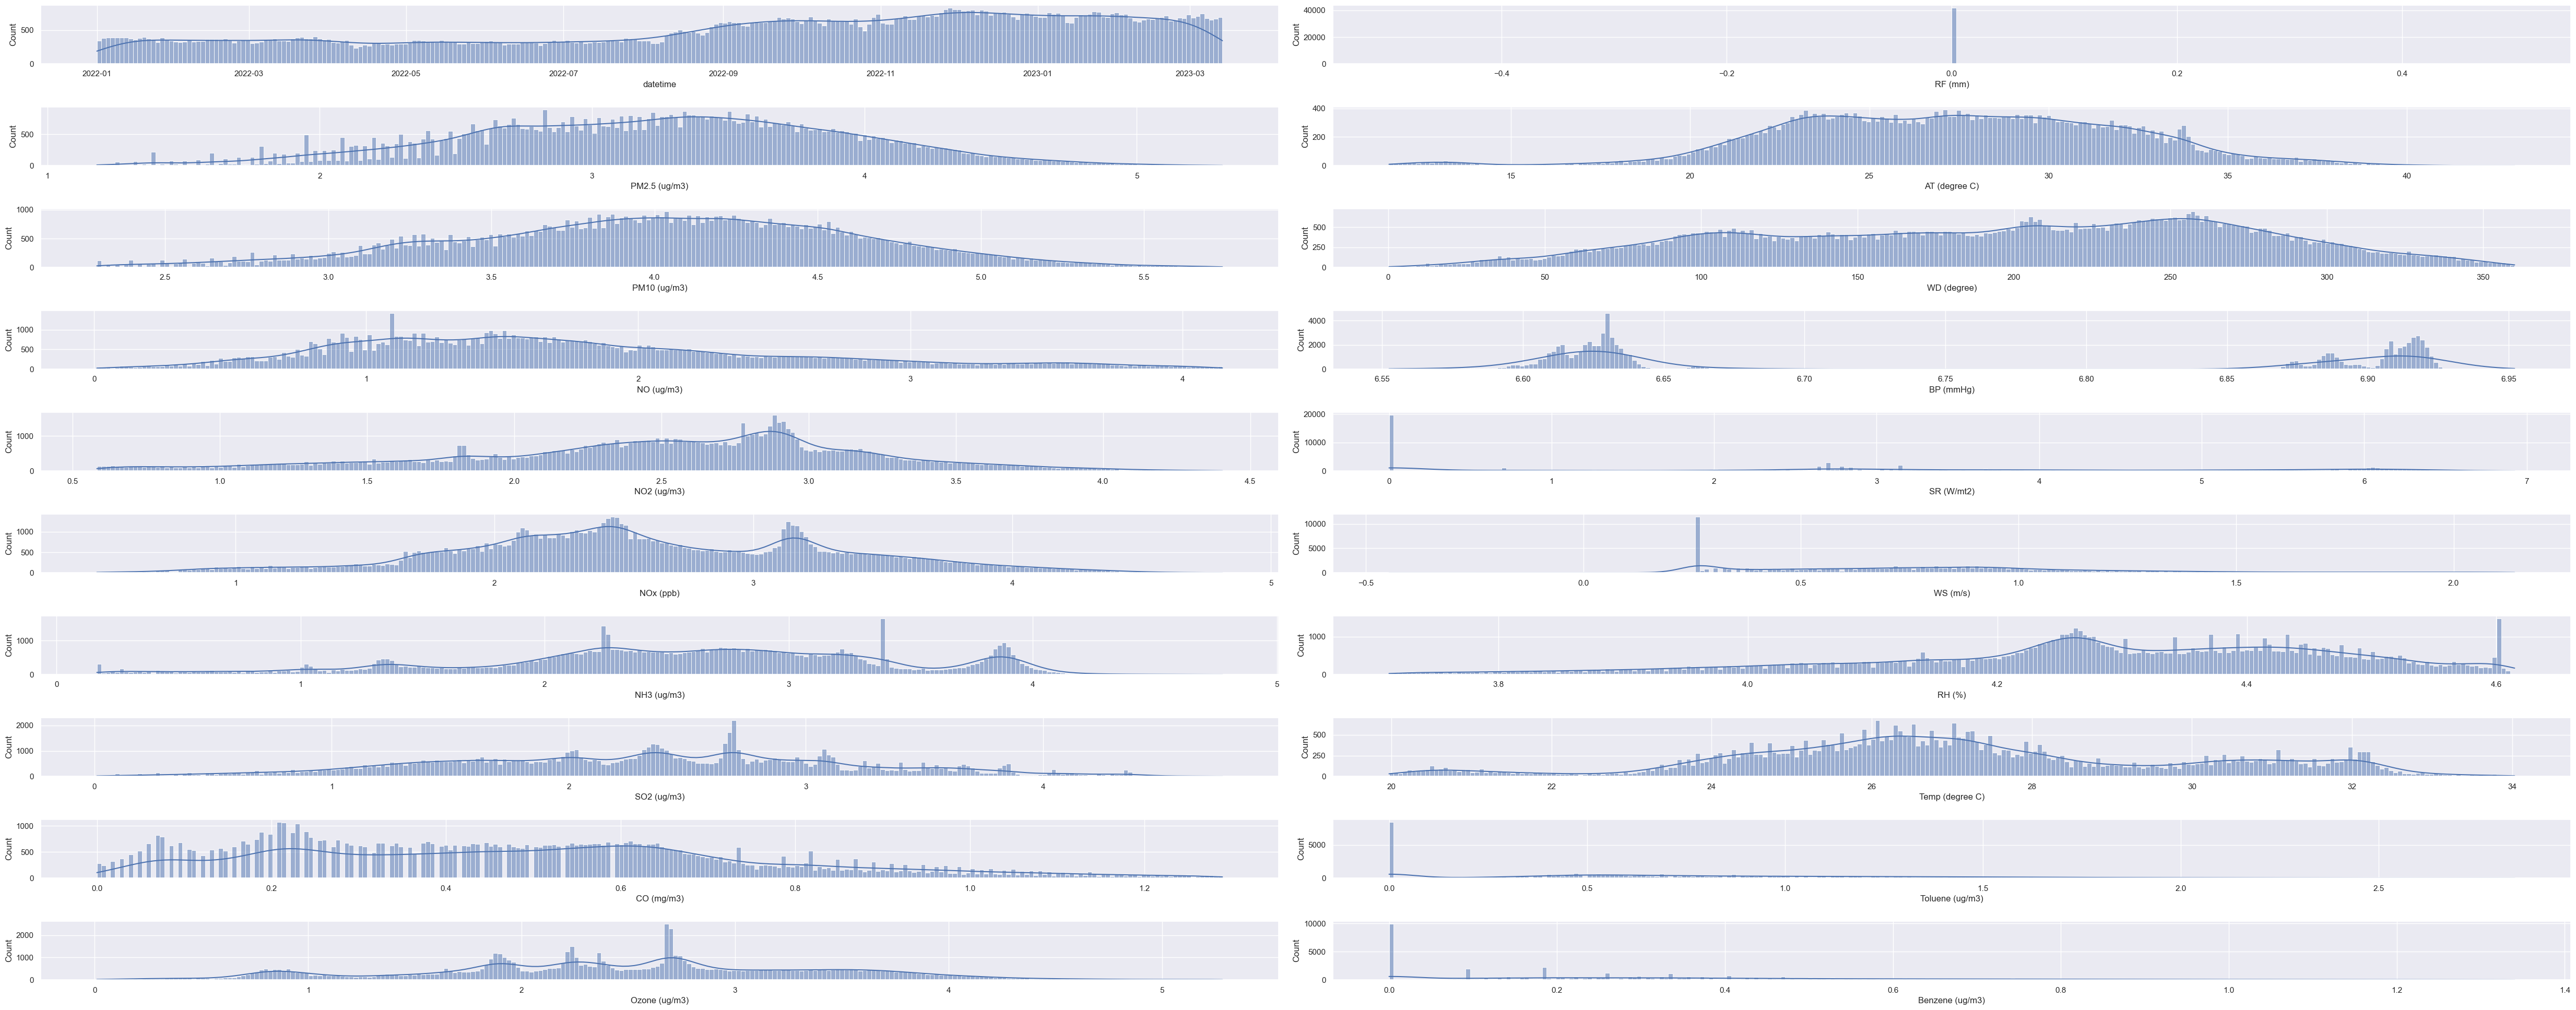

In [51]:
len_column = len(ds.columns) if len(ds.columns)%2 == 0 else len(ds.columns)+1

fig, axes = plt.subplots(len_column//2, 2, figsize=(50, 20))
fig.tight_layout(pad=3.0)

for i in range(len(ds.columns)//2):
    sns.histplot(data=ds[ds.columns[i]], bins=250, kde=True, ax=axes[i,0])
    sns.histplot(data=ds[ds.columns[len(ds.columns)-i-1]], bins=250, kde=True, ax=axes[i,1])

In [ ]:
data.columns

In [ ]:
non_transformed_values = ['Benzene (ug/m3)', 'Toluene (ug/m3)', 'RH (%)', 'WS (m/s)', 'SR (W/mt2)', 'BP (mmHg)','RF (mm)']

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(50, 20))
fig.tight_layout(pad=3.0)
c = ['Benzene (ug/m3)', 'Toluene (ug/m3)', 'RH (%)', 'WS (m/s)', 'SR (W/mt2)', 'BP (mmHg)','RF (mm)']
for i in range(len(c)//2):
    sns.histplot(data=dv[c[i]], bins=250, kde=True, ax=axes[i,0])
    sns.histplot(data=dv[c[4-i]], bins=250, kde=True, ax=axes[i,1])

In [ ]:
outlier_detection(data,remove=True)

In [ ]:
null_value_percentage(data)

In [41]:
dv

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),Toluene (ug/m3),Temp (degree C),RH (%),WS (m/s),SR (W/mt2),BP (mmHg),city,WD (degree),AT (degree C),RF (mm)
datetime,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,3.586016,4.248352,1.803359,3.940222,4.034064,4.632591,NaN,0.936093,2.009555,0.0,0.0,NaN,4.510200,1.196948,2.710048,6.636668,Chennai,100.49,NaN,NaN
2022-01-01 01:00:00,3.437208,4.132122,1.593309,3.878466,3.956231,4.420165,NaN,0.875469,2.010895,0.0,0.0,NaN,4.526452,1.153732,2.743417,6.635986,Chennai,91.62,NaN,NaN
2022-01-01 02:00:00,3.478776,4.164182,1.490654,3.790081,3.864931,4.534318,NaN,0.850151,1.994700,0.0,0.0,NaN,4.501142,1.187843,2.727853,6.635238,Chennai,103.66,NaN,NaN
2022-01-01 03:00:00,3.404193,4.106932,1.442202,3.726657,3.801538,4.605870,3.757239,0.609766,2.186051,0.0,0.0,NaN,4.474720,1.337629,2.809403,6.634896,Chennai,100.03,NaN,NaN
2022-01-01 04:00:00,3.244154,3.987316,1.439835,3.689629,3.766997,4.570165,3.449352,0.609766,2.618125,0.0,0.0,NaN,4.466368,1.294727,2.861057,6.635041,Chennai,100.57,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13 10:00:00,3.794365,4.085136,6.124246,4.270816,6.013984,0.985817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.141033,6.485581,6.913906,Ariyalur,239.36,30.04,NaN
2023-03-13 11:00:00,3.774139,4.035479,6.175493,4.336506,6.066618,1.283708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.134623,6.657600,6.913091,Ariyalur,239.64,31.84,NaN
2023-03-13 12:00:00,3.610918,4.043051,6.110314,4.349503,6.009034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.181727,6.644610,6.911747,Ariyalur,205.06,32.60,NaN
